In [1]:
# Dependencies
import tweepy
import json
import numpy as np
from datetime import datetime
import pandas as pd
from datetime import datetime
from config import consumer_key, consumer_secret, access_token, access_token_secret
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [2]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [3]:
target_user= ["@CNN","@BBC","@CBS","@nytimes","@FoxNews"]

n_items = 100
sentiment_array = []
tweet_text=[]
for target in target_user:
    tweet_text=[]
    compound_list=[]
    pos_list = []
    neg_list = []
    neu_list = []
    sentiment=[]
    tweet_time_objects = []
    tweet_times=[]
    for status in tweepy.Cursor(api.user_timeline, id=target,tweet_mode="extended").items(n_items):
        tweet = status._json
        result=analyzer.polarity_scores(tweet['full_text'])
        tweet_text.append(tweet['full_text'])
        tweet_times.append(tweet["created_at"])
        compound_list.append(result['compound'])
        pos_list.append(result['pos'])
        neg_list.append(result['neg'])
        neu_list.append(result['neu'])
        
        if target=="@CNN":
            CNN_dict={"User": target,"Tweet":tweet_text,"Compound": compound_list,"Positive": pos_list,"Neutral": neg_list,"Negative": neu_list,"Tweet Count": len(compound_list)}#,"Time of Tweet":tweet_times}
            time_in_between = []
            for x in range(len(tweet_times)):
                tweet_datetime = datetime.strptime(tweet_times[x], "%a %b %d %H:%M:%S %z %Y")
                tweet_time_objects.append(tweet_datetime)
            for x in range(len(tweet_time_objects)-1):
                time_apart = ((tweet_time_objects[x] - tweet_time_objects[x+1]).seconds) / 3600
                time_in_between.append(time_apart)
            CNN_dict_df=pd.DataFrame(CNN_dict)
            CNN_dict_df.to_csv("CNN_Tweet_Report.csv")            
        elif target=="@BBC":
            BBC_dict={"User": target,"Tweet":tweet_text,"Compound": compound_list,"Positive": pos_list,"Neutral": neg_list,"Negative": neu_list,"Tweet Count": len(compound_list)}#,"Time of Tweet":tweet_times}
            time_in_between = []
            
            for x in range(len(tweet_times)):
                tweet_datetime = datetime.strptime(tweet_times[x], "%a %b %d %H:%M:%S %z %Y")
                tweet_time_objects.append(tweet_datetime)
            for x in range(len(tweet_time_objects)-1):
                time_apart = ((tweet_time_objects[x] - tweet_time_objects[x+1]).seconds) / 3600
                time_in_between.append(time_apart)
            BBC_dict_df=pd.DataFrame(BBC_dict)
            BBC_dict_df.to_csv("BBC_Tweet_Report.csv")
            
        elif target=="@CBS":
            CBS_dict={"User": target,"Tweet":tweet_text,"Compound": compound_list,"Positive": pos_list,"Neutral": neg_list,"Negative": neu_list,"Tweet Count": len(compound_list),"Time of Tweet":tweet_times}
            for x in range(len(tweet_times)):
                tweet_datetime = datetime.strptime(tweet_times[x], "%a %b %d %H:%M:%S %z %Y")
                tweet_time_objects.append(tweet_datetime)
            for x in range(len(tweet_time_objects)-1):
                time_apart = ((tweet_time_objects[x] - tweet_time_objects[x+1]).seconds) / 3600
                time_in_between.append(time_apart)
            CBS_dict_df=pd.DataFrame(CBS_dict)
            CBS_dict_df.to_csv("CBS_Tweet_Report.csv")
            
        elif target=="@nytimes":
            nytimes_dict={"User": target,"Tweet":tweet_text,"Compound": compound_list,"Positive": pos_list,"Neutral": neg_list,"Negative": neu_list,"Tweet Count": len(compound_list),"Time of Tweet":tweet_times}
            for x in range(len(tweet_times)):
                tweet_datetime = datetime.strptime(tweet_times[x], "%a %b %d %H:%M:%S %z %Y")
                tweet_time_objects.append(tweet_datetime)
            for x in range(len(tweet_time_objects)-1):
                time_apart = ((tweet_time_objects[x] - tweet_time_objects[x+1]).seconds) / 3600
                time_in_between.append(time_apart)
            nytimes_dict_df=pd.DataFrame(nytimes_dict)
            nytimes_dict_df.to_csv("nytimes_Tweet_Report.csv")
        elif target=="@FoxNews":
            FoxNews_dict={"User": target,"Tweet":tweet_text,"Compound": compound_list,"Positive": pos_list,"Neutral": neg_list,"Negative": neu_list,"Tweet Count": len(compound_list),"Time of Tweet":tweet_times}
            for x in range(len(tweet_times)):
                tweet_datetime = datetime.strptime(tweet_times[x], "%a %b %d %H:%M:%S %z %Y")
                tweet_time_objects.append(tweet_datetime)
            for x in range(len(tweet_time_objects)-1):
                time_apart = ((tweet_time_objects[x] - tweet_time_objects[x+1]).seconds) / 3600
                time_in_between.append(time_apart)
            FoxNews_dict_df=pd.DataFrame(FoxNews_dict)
            FoxNews_dict_df.to_csv("FoxNews_Tweet_Report.csv")
    
    sentiment = {"User": target,
                 "Compound": "{0:.2f}".format(np.mean(compound_list)),
                 "Positive": "{0:.2f}".format(np.mean(pos_list)),
                 "Neutral": "{0:.2f}".format(np.mean(neg_list)),
                 "Negative": "{0:.2f}".format(np.mean(neu_list)),
                 "Tweet Count": len(compound_list),
                 "Average Tweet Time":"{0:.2f}".format(np.mean(time_in_between))}
    sentiment_array.append(sentiment)
sentiment_array_df=pd.DataFrame(sentiment_array)

sentiment_array_df


,Average Tweet Time,Compound,Negative,Neutral,Positive,Tweet Count,User
0,0.49,-0.11,0.83,0.11,0.06,100,@CNN
1,1.43,0.08,0.86,0.05,0.09,100,@BBC
2,7.28,0.43,0.84,0.02,0.14,100,@CBS
3,4.03,0.02,0.81,0.09,0.10,100,@nytimes
4,2.93,-0.05,0.82,0.10,0.07,100,@FoxNews


In [4]:
color4_df=pd.DataFrame({ 'color_1': ["r","lightblue","green","yellow","blue"],
                        'source': ["@CNN","@BBC","@CBS","@nytimes","@FoxNews"],
                        't':['a','b','c','d','e']})

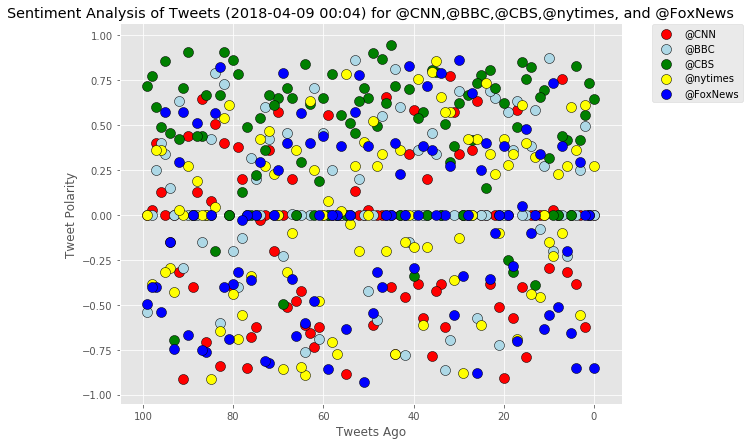

In [5]:
x=range(0,n_items)
plt.figure(figsize=(9,7))
plt.scatter(x,CNN_dict["Compound"], s=100 ,color='red',edgecolors="black" )
plt.scatter(x,BBC_dict["Compound"], s=100 ,color='lightblue',edgecolors="black" )
plt.scatter(x,CBS_dict["Compound"], s=100 ,color='green' ,edgecolors="black")
plt.scatter(x,nytimes_dict["Compound"], s=100 ,color='yellow' ,edgecolors="black")
plt.scatter(x,FoxNews_dict["Compound"], s=100 ,color='blue',edgecolors="black" )
plt.legend(color4_df['source'],numpoints=.2, bbox_to_anchor=(1.05, 1.01))#, loc='upper right')


now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now}) for {target_user[0]},{target_user[1]},{target_user[2]},{target_user[3]}, and {target_user[4]}")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
ax = plt.gca().invert_xaxis()

['@CNN', '@BBC', '@CBS', '@nytimes', '@FoxNews']
[-0.11, 0.08, 0.43, 0.02, -0.05]


(-0.2, 0.5)

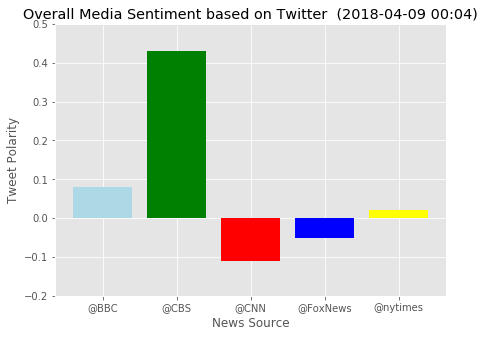

In [6]:
x=[]
y=[]
for i in range(len(sentiment_array)):
    x.append(sentiment_array[i]['User'])
    y.append(float(sentiment_array[i]['Compound']))
print(x)
print(y)
fig = plt.figure(figsize=(7,5))
my_colors = ["r","lightblue","green","yellow","blue"]
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Overall Media Sentiment based on Twitter  ({now})")
plt.ylabel("Tweet Polarity")
plt.xlabel("News Source")
plt.bar(x,y, color=my_colors)
plt.ylim(-.2, .5)

['@CNN', '@BBC', '@CBS', '@nytimes', '@FoxNews']
[0.49, 1.43, 7.28, 4.03, 2.93]


<Container object of 5 artists>

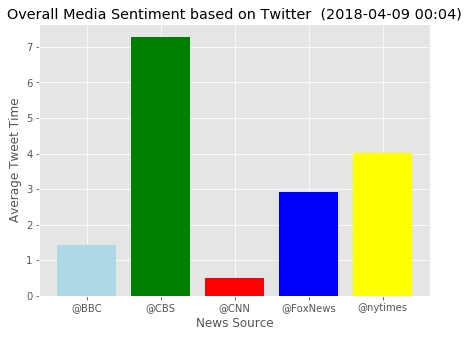

In [7]:
x=[]
y=[]
for i in range(len(sentiment_array)):
    x.append(sentiment_array[i]['User'])
    y.append(float(sentiment_array[i]['Average Tweet Time']))
print(x)
print(y)
fig = plt.figure(figsize=(7,5))
my_colors = ["r","lightblue","green","yellow","blue"]
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Overall Media Sentiment based on Twitter  ({now})")
plt.ylabel("Average Tweet Time")
plt.xlabel("News Source")
plt.bar(x,y, color=my_colors)
#plt.ylim(-.2, .5)